Задача заключается в предсказании по признакам цены на дом.

Исходные данные можно представить в виде матрицы X размера 20640 на 9 и вектора Y длины 20640, где X-это признаки, а Y-это цена на дом.
Для решения этой задачи можно использовать линейную регрессию. 

Метод линейной регрессии заключается в том, чтобы подобрать такие значение a и b, которые лучше всего удовлетворяют нашим данным (линейная функция имеет вид y = ax + b).


Для начала объясним, что такое $ x_i,  y_i $.

$x_i$-это i-ая строчка из X.

$y_i$-это i-ый элемент вектора Y.

Тогда перепишем нашу линейную функцию в след.виде: $x_i*w^T+~b+\epsilon_i= y_i$. 

Так же стоит добавить, что $x_i$ является независимой переменной, а $y_i$ является зависимой. 

Переменная $~b$-это постоянная величина (так как наша модельная линия не обязательно должна проходить через начало координат), а переменная $w$-это параметр регрессии, по-другому его называют весами (т.е. можно сказать, что это коэффициент наклона нашей прямой), а $\epsilon$-это ошибка, то есть некая случайная величина, которую нам и нужно минимизировать.

Оптимизированный функционал минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной ($y_i$) и прогнозом, выданным моделью, то есть нам нужно минимизировать ошибку, которая записывается следующим образом: $$ Q(w, b) = \sum_{i=1}^\ell (<x_i, w> +~ b - y_i)^2 \longrightarrow \min\limits_{w,b} $$

Стоит добавить, что в нашем случае $\ell$-это число равное 20640.

Он именно такой, потому что:

1. Требуется, чтобы $\epsilon_i$ (ошибка) имела нормальное распределение (даже можно сказать точнее, с мат.ожиданием равным 0 и фиксированным среднеквадратичным отклонением).

2. Эти ошибки являются независимыми.

Для решения данной задачи минимизации необходимо найти стационарные точки функции $ Q(w, b) $, то есть продифференцировав её по неизвестным параметрам $w$, а затем приравнять производные к нулю.

In [266]:
import numpy as np # для работы с векторами
import matplotlib.pyplot as plt # для рисования графиков
import pandas as pd # для работы с матрицами
import os as os # для смены директории
import math
import matplotlib
import torch

In [267]:
dt= pd.read_csv('housing.csv')# загружаем данные

In [268]:
dt.shape

(20640, 10)

In [263]:
dt.head()#выводим начало нашего датасета

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [196]:
dt.info()#выводим информацию о данных(т.е тип значений и количество их)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Опишим параметры в нашем dataset:

longitude-это долгота

latitude-это широта

housing_median_age-это среднее количество лет дома внутри блока

total_rooms-это общее число комнат в блоке

total_bedrooms-это общее число пален

population-это количество людей, живущих в блоке

households-это общее число семей,живущих в одном доме на блок

median_income-это средний доход семей внутри блока домов(в 10000 $ US)

median_house_value-это средняя цена дома внутри блока(в $ US)

ocean_proximity-это местоположение дома относительно моря/океана

In [204]:
#посчитаем сколько значений у нас нулевых и потом заполним средними значениями те, которые нулевые
a=dt['total_bedrooms'].isnull().sum()
a

207

In [206]:
dt['total_bedrooms'].fillna(dt['total_bedrooms'].mean())

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
5         213.0
6         489.0
7         687.0
8         665.0
9         707.0
10        434.0
11        752.0
12        474.0
13        191.0
14        626.0
15        283.0
16        347.0
17        293.0
18        455.0
19        298.0
20        184.0
21        367.0
22        541.0
23        337.0
24        437.0
25        123.0
26        244.0
27        421.0
28        492.0
29        160.0
          ...  
20610     484.0
20611     441.0
20612     289.0
20613     365.0
20614     460.0
20615     216.0
20616     441.0
20617     109.0
20618     247.0
20619     340.0
20620      41.0
20621     247.0
20622     147.0
20623     244.0
20624     300.0
20625      17.0
20626     184.0
20627      65.0
20628     421.0
20629    1856.0
20630     505.0
20631     493.0
20632     416.0
20633     412.0
20634     395.0
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Le

In [207]:
table = dt.groupby('ocean_proximity').size()
table

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

In [208]:
dt.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


AttributeError: 'numpy.ndarray' object has no attribute 'show'

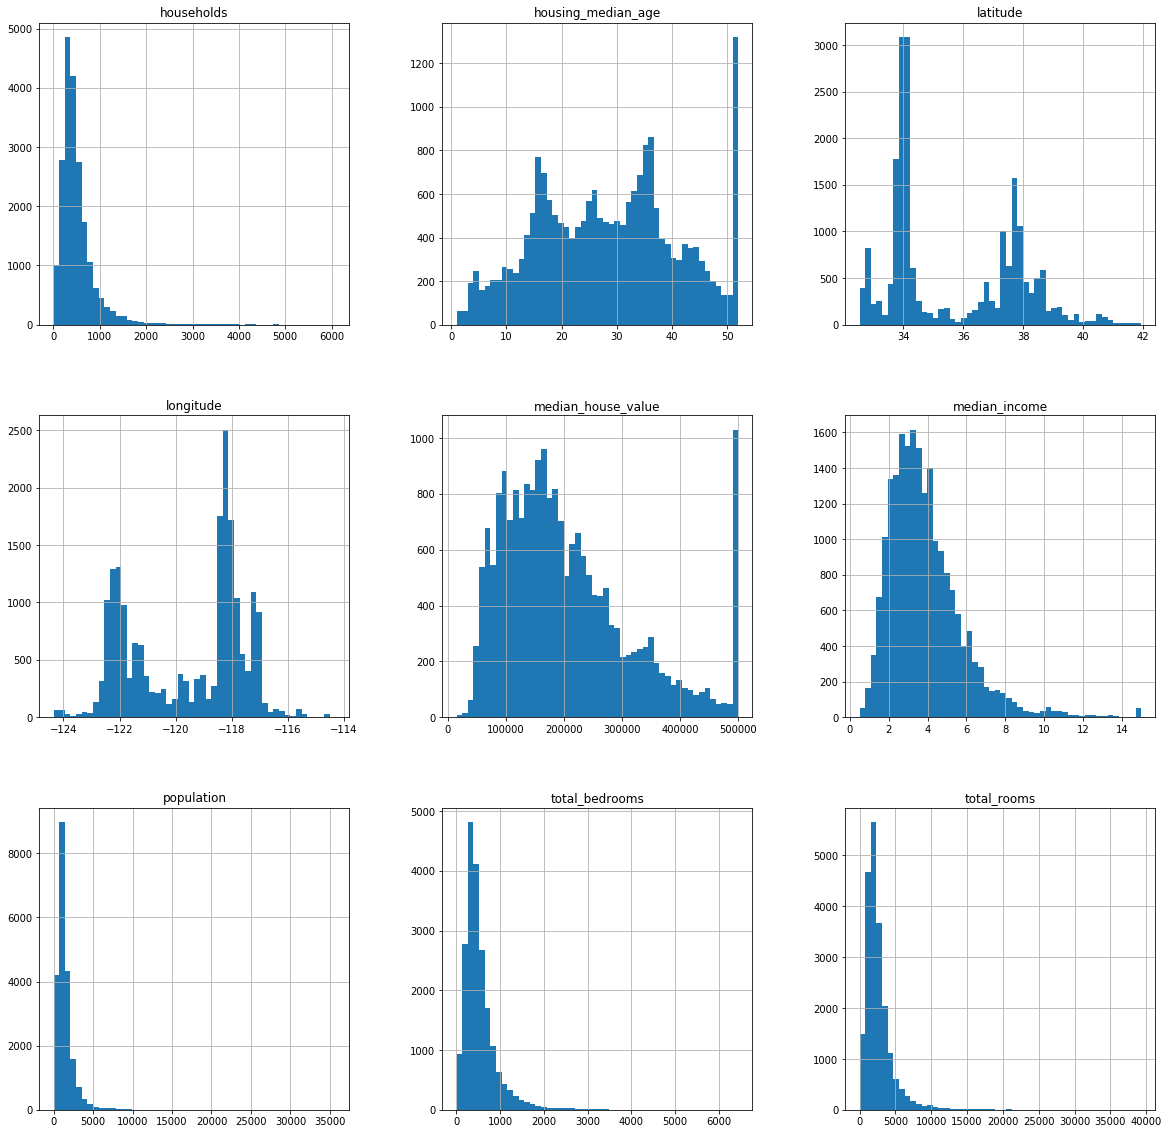

In [209]:
dt.hist(bins=50, figsize=(20,20)).show()#построим гистограммы по всем численным параметрам

In [147]:
medrooms=dt['total_rooms']/dt['households']#количество комнат на одну семью

In [148]:
medrooms

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
5        4.761658
6        4.931907
7        4.797527
8        4.294118
9        4.970588
10       5.477612
11       4.772480
12       5.322650
13       4.000000
14       4.262903
15       4.242424
16       5.939577
17       4.052805
18       5.343675
19       5.465455
20       4.524096
21       4.478142
22       5.096234
23       5.193846
24       5.270142
25       4.495798
26       4.728033
27       4.780856
28       4.401691
29       4.703226
           ...   
20610    4.851936
20611    4.359413
20612    5.157303
20613    4.500000
20614    4.801688
20615    5.461929
20616    4.826667
20617    4.921053
20618    5.893805
20619    6.388514
20620    4.125000
20621    7.923567
20622    4.808917
20623    5.101322
20624    5.835052
20625    7.285714
20626    6.573099
20627    6.067797
20628    5.238462
20629    5.519802
20630    5.932584
20631    6.145833
20632    6.023377
20633    5.445026
20634    6

создадим новый столбец в который запишем количество людей в семье приблизительное значение

In [149]:
population_per_household=dt['population']/dt['households']
population_per_household

0        2.555556
1        2.109842
2        2.802260
3        2.547945
4        2.181467
5        2.139896
6        2.128405
7        1.788253
8        2.026891
9        2.172269
10       2.263682
11       2.049046
12       2.346154
13       1.982759
14       1.954839
15       2.640152
16       2.395770
17       2.138614
18       2.362768
19       2.509091
20       2.463855
21       2.538251
22       2.123431
23       2.624615
24       2.383886
25       2.663866
26       2.539749
27       2.775819
28       2.391121
29       2.548387
           ...   
20610    2.722096
20611    2.843521
20612    2.850187
20613    3.039062
20614    3.069620
20615    3.675127
20616    3.085333
20617    2.701754
20618    3.212389
20619    3.456081
20620    3.145833
20621    3.082803
20622    2.910828
20623    2.634361
20624    2.512027
20625    2.071429
20626    2.947368
20627    2.864407
20628    2.610256
20629    3.801980
20630    2.824719
20631    2.777778
20632    2.719481
20633    2.832461
20634    3

In [150]:
dt['medrooms']=medrooms
dt['population_per_household']=population_per_household
dt.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,medrooms,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467


In [151]:
dt.corr()#выведем корреляцию между параметрами

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,medrooms,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.023737
medrooms,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.004852


In [152]:
from sklearn.linear_model import LinearRegression

In [153]:
from sklearn.cross_validation import train_test_split

сформируем тест, удалив из него определенные коллонки

In [210]:
train_x =dt.drop(['total_rooms','total_bedrooms','households','ocean_proximity','median_house_value'],axis=1)

разделим наши данные на тренировачнную и тестовую выборку

In [221]:
train_y = dt['median_house_value']
X,test_x,y,test_y = train_test_split(train_x, train_y, test_size=0.2,random_state=0)

In [224]:
regressor=LinearRegression()#создаем регрессор как метод, без указания каких-либо доп.параметров
regressor.fit(np.array(X),y)#тренируем модель

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [253]:
def roundup(x):
    return int(math.ceil(x / 100.0)) * 100 
prediction = list(map(roundup,regressor.predict(test_x)))

In [254]:
prediction

[233000,
 286500,
 194200,
 90800,
 281100,
 205000,
 305700,
 307000,
 297200,
 246300,
 231100,
 121700,
 92000,
 173900,
 227700,
 286400,
 359600,
 185600,
 199000,
 243700,
 169800,
 93000,
 288100,
 263200,
 169300,
 154200,
 192800,
 219100,
 185000,
 107400,
 329200,
 292600,
 269000,
 199200,
 67900,
 179400,
 188700,
 159800,
 214200,
 202500,
 206400,
 137400,
 122900,
 235900,
 213500,
 34500,
 180500,
 192600,
 237800,
 264200,
 335800,
 132300,
 301400,
 141000,
 125500,
 177000,
 115700,
 206900,
 220000,
 332000,
 178800,
 183600,
 128200,
 249200,
 137500,
 160000,
 115400,
 358500,
 238600,
 133400,
 435700,
 175600,
 163400,
 98300,
 260500,
 60200,
 224700,
 198300,
 228500,
 212200,
 280300,
 24600,
 87400,
 244600,
 248600,
 243200,
 82200,
 157500,
 120400,
 220900,
 257300,
 232500,
 105200,
 269100,
 74400,
 237400,
 278000,
 272400,
 83000,
 305300,
 198200,
 230100,
 165500,
 259600,
 243900,
 281500,
 192200,
 97900,
 101600,
 132500,
 280800,
 125200,
 2105

In [255]:
train_y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
5        269700.0
6        299200.0
7        241400.0
8        226700.0
9        261100.0
10       281500.0
11       241800.0
12       213500.0
13       191300.0
14       159200.0
15       140000.0
16       152500.0
17       155500.0
18       158700.0
19       162900.0
20       147500.0
21       159800.0
22       113900.0
23        99700.0
24       132600.0
25       107500.0
26        93800.0
27       105500.0
28       108900.0
29       132000.0
           ...   
20610     45500.0
20611     47000.0
20612     48300.0
20613     53400.0
20614     58000.0
20615     57500.0
20616     55100.0
20617     70800.0
20618     63400.0
20619     99100.0
20620    100000.0
20621     77500.0
20622     67000.0
20623     65500.0
20624     87200.0
20625     72000.0
20626     93800.0
20627    162500.0
20628     92400.0
20629    108300.0
20630    112000.0
20631    107200.0
20632    115600.0
20633     98300.0
20634    1

In [256]:
from sklearn.metrics import mean_squared_error

In [257]:
prediction2=regressor.predict(test_x)#прогнозируем результаты тестовой выборки

In [258]:
test_x

,longitude,latitude,housing_median_age,population,median_income
14740,-117.05,32.58,22.0,1551.0,4.1518
10101,-117.97,33.92,32.0,1296.0,5.7796
20566,-121.84,38.65,29.0,1554.0,4.3487
2670,-115.60,33.20,37.0,390.0,2.4511
15709,-122.43,37.79,25.0,649.0,5.0049
439,-122.29,37.85,52.0,218.0,2.5682
845,-122.07,37.58,16.0,1117.0,6.0661
3768,-118.43,34.17,37.0,794.0,5.9275
964,-121.89,37.68,12.0,3329.0,6.3373
8681,-118.33,33.87,44.0,373.0,3.9167


Воспользуемся методом "среднеквадратичной ошибки".

In [259]:
mse = mean_squared_error(test_y, prediction2)
rmse

74145.01124382486

In [260]:
regressor.score(X,y)

0.5983822263253644